# Template Matching - CAPTCHA

O objetivo desse programa é fazer o reconhecimento de caracteres de um CAPTCHA simples por cálculo de template matching.

**1. Etapa:**

Fazer a conversão da imagem para espaço de cor HSV, aplicar os filtros, morfologia matemática, segmentação da imagem e cortar a imagem nos cinco caracteres presentes

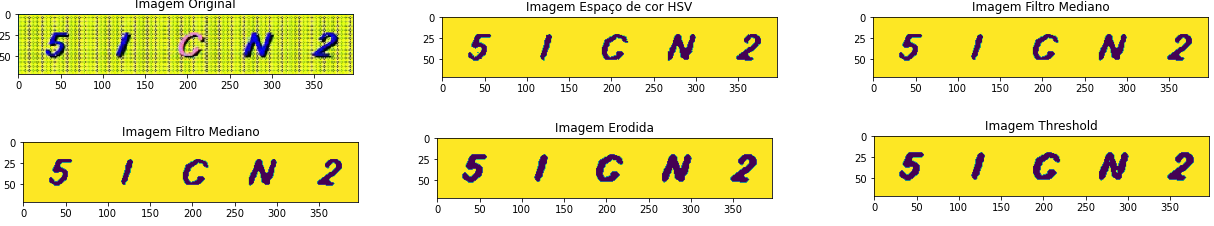

**2. Etapa:**

Percorrer cada imagem cortada e calcular o template matching de cada.

**3. Etapa:**

Organizar o  vetor com os candidatos a solução de acordo com  template matching calculado

**4. Etapa:**

Captcha solução


In [34]:
#! python3

# Bibliotecas
import imutils
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline


# Caminho
path = os.getcwd()

# Lendo todos os png existentes na pasta Repositorio captcha Cut
path_repositorio_captcha_cut = path + '/images/captcha_cut'
filelist_captcha_cut = [f for f in os.listdir(path_repositorio_captcha_cut) if f.endswith(".png")]

# Deletar os arquivos .png da pasta captcha cut
for f in filelist_captcha_cut:
    os.remove(os.path.join(path_repositorio_captcha_cut, f))


# Lendo todos os png existentes na pasta templates captcha
path_repositorio_captcha = path + '/images/captchas'
filelist_captcha = [f for f in os.listdir(path_repositorio_captcha) if f.endswith(".png")]


# PEGAR O CAPTCHA
captcha_random = random.choice(filelist_captcha)
main_image = cv2.imread(path + f'/images/captchas/{captcha_random}')


In [35]:
# Imagem no espaço HSV
hsv = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

# Limites superior e inferior
lim_inf = np.array([15, 0, 0])
lim_sup = np.array([103, 255, 255])

color_mask = cv2.inRange(hsv, lim_inf, lim_sup)

# Filtro Mediano
img_mediano = cv2.medianBlur(color_mask, 3)

# Filtro Bilateral
img_bilateral = cv2.bilateralFilter(img_mediano, 9, 75, 75)

# Img Erodida
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img_erode = cv2.erode(img_bilateral, elementoEstruturante, iterations=1)

# Threshold
img_th = cv2.adaptiveThreshold(img_erode, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 1)


# Dividir o Captcha em 5 e salvar
img_th1 = img_th[0:71, 0:79]
img_th2 = img_th[0:71, 80:159]
img_th3 = img_th[0:71, 160:238]
img_th4 = img_th[0:71, 239:317]
img_th5 = img_th[0:71, 318:]


cv2.imwrite(path + f'/images/captcha_cut/captcha_pt_0.png', img_th1)
cv2.imwrite(path + f'/images/captcha_cut/captcha_pt_1.png', img_th2)
cv2.imwrite(path + f'/images/captcha_cut/captcha_pt_2.png', img_th3)
cv2.imwrite(path + f'/images/captcha_cut/captcha_pt_3.png', img_th4)
cv2.imwrite(path + f'/images/captcha_cut/captcha_pt_4.png', img_th5)



True

In [36]:
# Lendo todos os png existentes na pasta Repositorio captcha Cut
path_repositorio_captcha_cut = path + '/images/captcha_cut'
filelist_captcha_cut = [f for f in os.listdir(path_repositorio_captcha_cut) if f.endswith(".png")]


# Lendo todos os png existentes na pasta Repositorio dos templates
path_repositorio = path + '/images/chars'
filelist = [f for f in os.listdir(path_repositorio) if f.endswith(".png")]



In [37]:
vetor_letras = []
max_valor_template = []

for j in range(len(filelist_captcha_cut)):

    img_captcha = cv2.imread(path + f'/images/captcha_cut/{filelist_captcha_cut[j]}')
    

    for i in range(len(filelist)):

        # Ler a imagem modelo
        template = cv2.imread(path + f'/images/chars/{filelist[i]}')

        (height, width) = template.shape[:2]

        temp_found = None
        
        match = cv2.matchTemplate(img_captcha, template, cv2.TM_CCOEFF_NORMED)
        (_, val_max, _, loc_max) = cv2.minMaxLoc(match)

        # Matriz com os valores dos calculos de valores max
        max_valor_template.append([j,{filelist[i]:val_max}])


        print(f'O valor de correspondência é: {val_max}')
print(max_valor_template)


O valor de correspondência é: 0.3249365985393524
O valor de correspondência é: 0.4519616961479187
O valor de correspondência é: 0.5058993101119995
O valor de correspondência é: 0.3504653871059418
O valor de correspondência é: 0.4922979176044464
O valor de correspondência é: 0.2043224722146988
O valor de correspondência é: 0.5712786316871643
O valor de correspondência é: 0.6574719548225403
O valor de correspondência é: 0.5229011178016663
O valor de correspondência é: 0.587520956993103
O valor de correspondência é: 0.5508366823196411
O valor de correspondência é: 0.21138814091682434
O valor de correspondência é: 0.5503518581390381
O valor de correspondência é: 0.5875188112258911
O valor de correspondência é: 0.7140883803367615
O valor de correspondência é: 0.36174437403678894
O valor de correspondência é: 0.39174240827560425
O valor de correspondência é: 0.8936768770217896
O valor de correspondência é: 0.6421842575073242
O valor de correspondência é: 0.6609357595443726
O valor de corresp

In [38]:
# Organizando o vetor com os candidatos a solução conforme a pontuação do vetor max_valor_template
mat = pd.DataFrame(max_valor_template)

list_mat = list(mat.groupby([0]))
#print(list_mat)

campeoes=[] # Matriz com os modelos com melhor valor_max calculado

for i in range(len(list_mat)):
    a = list_mat[i][1]
    pontos = [list(valor.values()) for valor in a[1]]
    pontuacao = [ponto[0] for ponto in pontos]
    campea = np.flip(np.argsort(pontuacao))

    campeoes.append(campea[0])

print(campeoes)


[np.int64(17), np.int64(28), np.int64(33), np.int64(26), np.int64(10)]


In [39]:
# Vetor dos captcha solução
letras_captchas = []
for j in range(len(campeoes)):
    letras_captchas.append(filelist[campeoes[j]].split('.')[0])

letras_captchas_total = pd.Series(letras_captchas)

letras_captchas_total = letras_captchas_total.str.replace('C-Dilha', 'Ç')

letras_captchas_total = letras_captchas_total.tolist()
print(letras_captchas_total)
print(captcha_random)


['T', 'P', 'S', 'O', 'X']
frame569.png


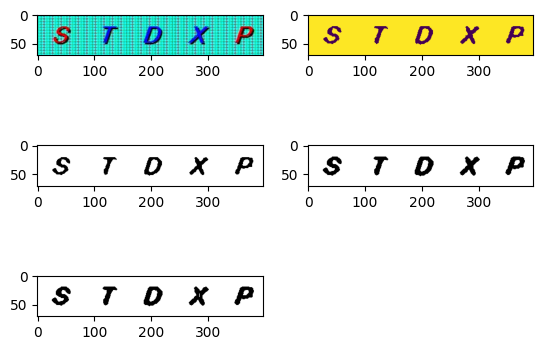

In [40]:
plt.subplot(3,2,1), plt.imshow(main_image)
plt.subplot(3,2,2), plt.imshow(color_mask)
plt.subplot(3,2,3), plt.imshow(img_bilateral, cmap='gray')
plt.subplot(3,2,4), plt.imshow(img_erode, cmap='gray')
plt.subplot(3,2,5), plt.imshow(img_th, cmap='gray')
plt.show()